In [ ]:
#NB
#Step1: Loading initial libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#step2 : Importing Dataset
dataset =pd.read_csv('/content/datacancer.csv')
dataset.shape

(569, 32)

In [ ]:
print(dataset)

In [ ]:
#step3:- Exploring Dataset
dataset.columns

In [ ]:
dataset.info()

In [ ]:
dataset = dataset.drop(["id"],axis =1)

In [ ]:
#Step-4: Visualizing Dataset
M = dataset[dataset.diagnosis == "M"]
B = dataset[dataset.diagnosis == "B"]


In [ ]:
plt.title(" Malignant vs benign Tumor")
plt.xlabel("Radius mean")
plt.ylabel("texture mean")
plt.scatter(M.radius_mean, M.texture_mean, color = "red")
plt.scatter(B.radius_mean, B.texture_mean, color = "lime")
plt.legend()
plt.show()


In [ ]:
#step 5:- preprocessing
dataset.diagnosis =[1 if i=="M" else 0 for i in dataset.diagnosis]


In [ ]:
x = dataset.drop(["diagnosis"], axis = 1)
y = dataset.diagnosis.values

In [ ]:
#step 6:- data normalization
import numpy as np
x = (x - np.min(x)) / (np.max(x) - np.min(x))

In [ ]:
#step 7:- Test Train split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
#Step-8: Sklearn Gaussian Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = nb.predict(x_test)

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [ ]:
#Step-9: Accuracy
#The following accuracy score reflects how successfully our Sklearn Gaussian Naive Bayes model predicted
#cancer using the test data.
print("Naive Bayes score: ",nb.score(x_test, y_test))

Naive Bayes score:  0.9415204678362573


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[104   4]
 [  6  57]]


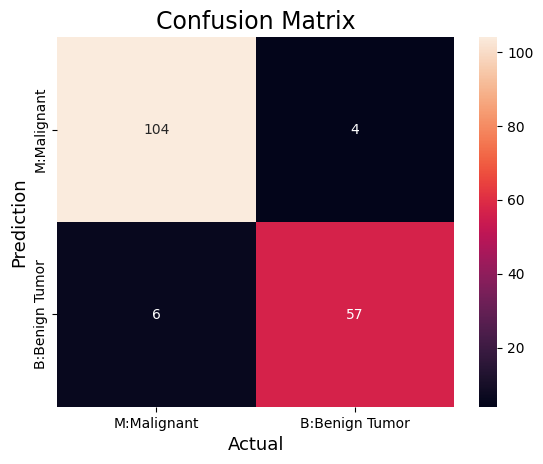

In [ ]:
import seaborn as sns
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['M:Malignant','B:Benign Tumor'],#Malignant vs Benign Tumor
            yticklabels=['M:Malignant','B:Benign Tumor'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()